## The Advanced Computing Center for Research and Education (ACCRE) is a computer cluster serving the high-performance computing needs of research for Vanderbilt University. 

**In this data question, we will be analyzing data on jobs run on ACCRE's hardware**

In [1]:
import pandas as pd
import re

**DATA DICTIONAR**
**JOBID**	The identification number of the job or job step. Regular jobs are in the form JobID and array jobs are in the form ArrayJobID_ArrayTaskID;
**ACCOUNT**	The account under which the job was submitted;
**USER**	The user who submitted the job;
**USEDMEM**	Used memory in megabytes per-node
**REQTIME**	Requested time in d-hh:mm:ss or hh:mm:ss;
**USEDTIME**	Used time in d-hh:mm:ss or hh:mm:ss;
**NODES**	Number of servers used for this job;
**CPUS**	Total number of CPU-cores allocated to the job;
**GPUS**	Total number of GPUs allocated to the job;
**PARTITION**	Identifies the partition on which the job ran;
**EXITCODE**	The exit code returned by the job script or salloc, typically as set by the exit() function. Following the colon is the signal that caused the process to terminate if it was terminated by a signal;
**STATE**	Job state or status (COMPLETED, CANCELLED, FAILED, TIMEOUT, PREEMPTED, etc.);

In [2]:
df1 = pd.read_csv('data/accre-gpu-jobs-2022-v2.csv', error_bad_lines=False)

C:\Users\upadh\AppData\Local\Temp\ipykernel_9624\3937202199.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('data/accre-gpu-jobs-2022-v2.csv', error_bad_lines=False)
b'Skipping line 124084: expected 12 fields, saw 13\nSkipping line 124809: expected 12 fields, saw 13\n'


In [3]:
df1.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED


In [4]:
df1.shape

(336950, 12)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336950 entries, 0 to 336949
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   JOBID      336950 non-null  object
 1   ACCOUNT    336950 non-null  object
 2   USER       336950 non-null  object
 3   USEDMEM    336950 non-null  object
 4   REQTIME    336950 non-null  object
 5   USEDTIME   336950 non-null  object
 6   NODES      336950 non-null  int64 
 7   CPUS       336950 non-null  int64 
 8   GPUS       336950 non-null  int64 
 9   PARTITION  336950 non-null  object
 10  EXITCODE   336950 non-null  object
 11  STATE      336950 non-null  object
dtypes: int64(3), object(9)
memory usage: 30.8+ MB


In [6]:
df1['ACCOUNT'].nunique()

27

In [7]:
df1['ACCOUNT'].value_counts()

glasshouse       247125
malanga           51677
virginia          10342
prince             7499
grisette           5828
harovin            5046
antares            3222
sunburst           1522
pasilla            1362
plumcot            1080
pecans              628
kinnow              436
bertanne            221
almonds             221
apple               210
cactus              117
clara               100
orange               79
rosemarie            56
horseradish          52
sugranineteen        43
white                36
pinole               20
gem                  19
packham               7
bunch                 1
summer                1
Name: ACCOUNT, dtype: int64

In [8]:
df1['JOBID'].nunique()

336950

In [9]:
df1['USEDTIME'].value_counts()

00:00:00    51083
00:00:07    19788
00:00:08    11147
00:00:09     6900
00:00:06     5785
            ...  
09:02:07        1
09:41:15        1
09:04:46        1
05:20:19        1
01:37:38        1
Name: USEDTIME, Length: 20818, dtype: int64

In [10]:
df1['USEDMEM'].value_counts()

0          58747
5.53M      27838
7.41M      17001
5.54M      13246
7.42M       3473
           ...  
214.51M        1
219.42M        1
217.21M        1
217.34M        1
145.24M        1
Name: USEDMEM, Length: 114062, dtype: int64

**SUMMARY OBSERVATION**: There are **336950 rows and 12 columns** in the df. .csv lines 124084 and 124809 are having one extra column. 

**Nodes, CPU and GPU** are the ony **int column rest are objects.**

There are **27 users : TOP 3 maximum USER: glasshouse, malanga and virginia.and Bottom 3 least user: packham, bunch and summer** 
There are **51083** observations with **00:00:00 USEDTIME**
We have **58747** observations that have **0 USEDMEM** so there are **7664 (58747 - 51083)** some jobs that ran in less than a minute time.

The JOBIDs GPUS usage go from 1  to 60 with maximum (327056) jobs needing 1 GPU some needing 20


In [11]:
df1['GPUS'].value_counts().tail(20).sort_index()


1     327056
2       5909
3        143
4       2290
6         56
8        762
12       225
16       398
18         9
20         2
24        76
30         2
32        15
40         5
60         2
Name: GPUS, dtype: int64

<AxesSubplot:>

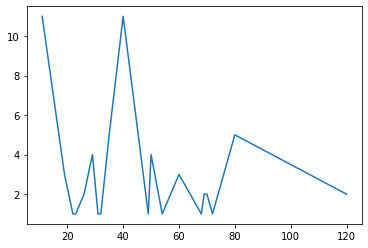

In [12]:
df1['CPUS'].value_counts().tail(20).sort_index().plot()

In [13]:
df1['NODES'].value_counts()

1     285150
0      50901
3        368
2        354
4         91
5         57
7         12
6          8
10         5
15         2
8          1
9          1
Name: NODES, dtype: int64

In [61]:
df1['EXITCODE'].value_counts()


0:0      336164
1:0         407
0:9         185
0:15        130
2:0          17
0:6          10
126:0         8
7:0           7
127:0         6
13:0          5
16:0          3
0:125         3
33:0          2
0:2           1
9:0           1
0:7           1
Name: EXITCODE, dtype: int64

<AxesSubplot:>

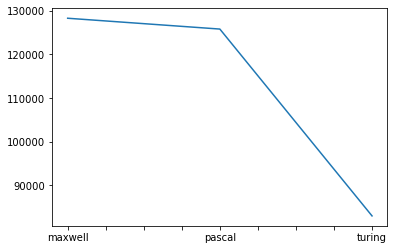

In [54]:
df1['PARTITION'].value_counts().tail(20).sort_index()
df1['PARTITION'].value_counts().tail(20).sort_index().plot()

**DATA Questions:**
    The main objectives of this project are to examine the following questions:

Q1 What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition? Knowing this will help ACCRE to understand our users memory needs for future hardware purchases.

Q2 What is the distribution of the number of GPUs in each job (runtime-weighted) for each partition? What fraction of runtime-weighted and GPU-weighted jobs are using more than 4 GPUs and thus probably using the RoCE networking? Is this fraction different for each partition?

Q3 What is the total runtime usage per-gpu (i.e. multiply runtime by the number of gpus) in each of the 3 partitions over the last year?

Q4 What is the distribution of different groups and users accessing each partition? In each partition, who are the top users, and do they represent a majority of the runtime-weighted jobs on the partition?

Q5 Currently there is a 5 day limit on runtime for GPU jobs, although some users have been asking for extensions. What is the distribution of requested runtime and actual runtime on jobs on each partition? Do users really need more time, or are they simply always requesting the maximum?

In [15]:
df1['REQTIME'].value_counts()

10:00:00       138155
2-00:00:00      54776
00:30:00        30667
5-00:00:00      28541
12:00:00        14080
                ...  
13:00:00            1
10-00:00:00         1
2-05:00:00          1
00:22:00            1
11-00:00:00         1
Name: REQTIME, Length: 76, dtype: int64

In [16]:
#f1.groupby(['ACCOUNT','PARTITION'])['USEDMEM'].sum().sort_index() 
# this is not going to add the numbers in USEDMEM because it is an object, so we see the 

In [17]:
df1['STATE'].nunique()

98

In [18]:
df1['STATE'].value_counts()

COMPLETED              283333
CANCELLED by 9201       41637
CANCELLED by 174423      6116
RUNNING                  1237
CANCELLED                 947
                        ...  
CANCELLED by 859439         1
CANCELLED by 0              1
CANCELLED by 765671         1
CANCELLED by 856815         1
CANCELLED by 899035         1
Name: STATE, Length: 98, dtype: int64

In [19]:
df1['STATE'].unique()

array(['COMPLETED', 'CANCELLED by 9201', 'CANCELLED by 859023',
       'CANCELLED by 153500', 'CANCELLED by 168618',
       'CANCELLED by 888717', 'FAILED', 'CANCELLED by 859269',
       'CANCELLED by 756088', 'CANCELLED by 887337',
       'CANCELLED by 858683', 'CANCELLED', 'CANCELLED by 885613',
       'CANCELLED by 342288', 'CANCELLED by 855431',
       'CANCELLED by 491383', 'CANCELLED by 776393',
       'CANCELLED by 844796', 'CANCELLED by 780767',
       'CANCELLED by 505355', 'CANCELLED by 649321',
       'CANCELLED by 890189', 'CANCELLED by 59229', 'CANCELLED by 649319',
       'CANCELLED by 590520', 'CANCELLED by 478095',
       'CANCELLED by 196703', 'CANCELLED by 308082',
       'CANCELLED by 757496', 'CANCELLED by 454080',
       'CANCELLED by 512947', 'CANCELLED by 762866',
       'CANCELLED by 859465', 'CANCELLED by 161909',
       'CANCELLED by 785491', 'CANCELLED by 90423', 'CANCELLED by 159541',
       'CANCELLED by 859439', 'CANCELLED by 349259',
       'CANCELLED by 

In [20]:
#df2 = df1.groupby(['ACCOUNT','PARTITION','STATE'])['USEDMEM', 'USEDTIME'].agg('sum')
#df2.head(10)


**making a df with only the completed jobs**

In [21]:
df_State_comleted = df1.loc[df1['STATE'] == 'COMPLETED']

In [22]:
df_State_comleted.shape

(283333, 12)

In [23]:
df_State_comleted['ACCOUNT'].value_counts()

glasshouse       237060
malanga            9901
virginia           9556
prince             7459
grisette           5786
harovin            4729
antares            3203
sunburst           1390
pasilla            1329
plumcot            1027
pecans              609
kinnow              380
bertanne            195
almonds             189
cactus              113
clara                76
orange               74
rosemarie            55
horseradish          48
apple                45
white                31
sugranineteen        31
pinole               19
gem                  19
packham               7
summer                1
bunch                 1
Name: ACCOUNT, dtype: int64

In [24]:
timeInterval ='00:35:01'
list = timeInterval.split(':')
hours = list[0]
minutes = list[1]
seconds = list[2]
total = (int(hours) * 3600 + int(minutes) * 60 + int(seconds))
print("total = ", total)

total =  2101


In [25]:
#df1['Time'] = pd.to_timedelta(df1['USEDTIME']) #this is not needed we will split using the regullr expressions

**Trying to make a function to convert the USEDTIME into a seonds column**

In [26]:
time = df1['USEDTIME'].tolist()[0] # converting the first row into the list and spliting on the :
time_list = time.split(':')
print(time_list)

hours = time_list[0]
minutes = time_list[1]
seconds = time_list[2]
total = (int(hours) * 3600 + int(minutes) * 60 + int(seconds))
print(total)

['00', '13', '13']
793


In [27]:
df1.head(10)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40M,3-12:00:00,18:49:36,1,1,1,pascal,0:0,COMPLETED
6,32880722,glasshouse,brady,0,3-12:00:00,3-12:00:07,1,1,1,pascal,0:0,COMPLETED
7,32880741,malanga,arline,1119.66M,2-00:00:00,08:09:18,1,2,1,pascal,0:0,COMPLETED
8,32880758,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201
9,32880759,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201


In [28]:
time = df1['USEDTIME'].tolist()[6]
time_list = time.split('-:')
time_list

['3-12:00:07']

In [29]:
re.split('[-:]', time)

['3', '12', '00', '07']

In [30]:
time = df1['USEDTIME'].tolist()[6] # there is a day in the usedtime
time_list1 = re.split('[-:]', time)
print(time_list1)
x = []

def time_function(time_list1): 
    if len(time_list1) != 4:
        days = 0
    else:
        days = time_list1[-4]
    hours = time_list1[-3]
    minutes = time_list1[-2]
    seconds = time_list1[-1]
    total_1 = (int(days)* 86400 + int(hours) * 3600 + int(minutes) * 60 + int(seconds))
    #x.append(total)
    print(total_1)

['3', '12', '00', '07']


In [31]:
time_list1  = re.split('[-:]', time)
time_function(time_list1)

##it is working for the days in the column (d-hh:mm:ss) we need to modify the slplit arrgument so that the list item at index [0] becomes 0 if there are no days.

302407


## Writing the time_function to convert the used time into seconds and .apply it to the column to convert it into seconds.
As we have some rows with days-hh:mm:ss and some with hh:mm:ss we will split the value into a string using either the '-' or ':'
                and as maximum length will be four eg. ['3', '12', '00', '07'] the last index item [-1] will be seconds, -2 is min,  -3 is hours and -4 is days, not all have the days IN THEM TEHY will not have the -4 index item so that will be nested in the if and else statement

In [32]:
def time_function(time): 
    time_list1 = re.split('[-:]', time)
    if len(time_list1) != 4:
        days = 0
    else:
        days = time_list1[-4]
    hours = time_list1[-3]
    minutes = time_list1[-2]
    seconds = time_list1[-1]
    total_sec = (int(days)* 86400 + int(hours) * 3600 + int(minutes) * 60 + int(seconds))
    #x.append(total)
    return (total_sec)

In [33]:
time_function(time)

302407

In [34]:
df1['USED_SEC'] = df1['USEDTIME'].apply(time_function)
df1['REQ_SEC'] = df1['REQTIME'].apply(time_function)
df1.head(10)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USED_SEC,REQ_SEC
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,793,172800
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,22,18000
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,537,18000
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,18586,72000
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,15070,54000
5,32880721,glasshouse,brady,403.40M,3-12:00:00,18:49:36,1,1,1,pascal,0:0,COMPLETED,67776,302400
6,32880722,glasshouse,brady,0,3-12:00:00,3-12:00:07,1,1,1,pascal,0:0,COMPLETED,302407,302400
7,32880741,malanga,arline,1119.66M,2-00:00:00,08:09:18,1,2,1,pascal,0:0,COMPLETED,29358,172800
8,32880758,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201,0,172800
9,32880759,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201,0,172800


**Converting the usedtime column in seconds the function needs to be fixed we are going to use the timedelta package**

In [35]:
df1['time_day'] = df1.USEDTIME.str.replace('-','days ',regex=True)

df1['time_delta'] = pd.to_timedelta(df1['time_day'])

df1.head(10)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USED_SEC,REQ_SEC,time_day,time_delta
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,793,172800,00:13:13,0 days 00:13:13
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,22,18000,00:00:22,0 days 00:00:22
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,537,18000,00:08:57,0 days 00:08:57
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,18586,72000,05:09:46,0 days 05:09:46
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,15070,54000,04:11:10,0 days 04:11:10
5,32880721,glasshouse,brady,403.40M,3-12:00:00,18:49:36,1,1,1,pascal,0:0,COMPLETED,67776,302400,18:49:36,0 days 18:49:36
6,32880722,glasshouse,brady,0,3-12:00:00,3-12:00:07,1,1,1,pascal,0:0,COMPLETED,302407,302400,3days 12:00:07,3 days 12:00:07
7,32880741,malanga,arline,1119.66M,2-00:00:00,08:09:18,1,2,1,pascal,0:0,COMPLETED,29358,172800,08:09:18,0 days 08:09:18
8,32880758,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201,0,172800,00:00:00,0 days 00:00:00
9,32880759,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201,0,172800,00:00:00,0 days 00:00:00


In [36]:
df1['MEM'] = df1['USEDMEM'].str.replace('M','',regex=True).str.strip()
#list = mem.split('M')
#list
df1 = df1.astype({"MEM":'float'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336950 entries, 0 to 336949
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   JOBID       336950 non-null  object         
 1   ACCOUNT     336950 non-null  object         
 2   USER        336950 non-null  object         
 3   USEDMEM     336950 non-null  object         
 4   REQTIME     336950 non-null  object         
 5   USEDTIME    336950 non-null  object         
 6   NODES       336950 non-null  int64          
 7   CPUS        336950 non-null  int64          
 8   GPUS        336950 non-null  int64          
 9   PARTITION   336950 non-null  object         
 10  EXITCODE    336950 non-null  object         
 11  STATE       336950 non-null  object         
 12  USED_SEC    336950 non-null  int64          
 13  REQ_SEC     336950 non-null  int64          
 14  time_day    336950 non-null  object         
 15  time_delta  336950 non-null  timed

In [37]:
df1.groupby(['PARTITION', 'GPUS'])['MEM'].sum()

PARTITION  GPUS
maxwell    1       1.217198e+08
           2       4.527200e+06
           3       2.081270e+04
           4       4.687104e+06
           6       6.202413e+05
           8       7.860130e+05
           12      1.339981e+06
           16      2.582316e+05
           18      4.658754e+04
           20      1.821864e+04
           24      3.332333e+04
           30      5.787480e+03
           32      0.000000e+00
           40      2.409000e+01
pascal     1       1.810746e+08
           2       1.795796e+07
           3       3.769252e+05
           4       1.098739e+07
           8       4.495691e+06
           12      3.066792e+05
           16      4.060882e+06
           24      6.496974e+05
           32      2.810732e+05
           60      9.940000e+00
turing     1       2.656471e+08
           2       8.369886e+06
           3       2.389163e+06
           4       9.894478e+06
           8       2.737894e+06
           12      3.127498e+05
           16      2.883

In [38]:
#df3 = df1.groupby(['ACCOUNT','PARTITION','STATE'])['MEM', 'USED_SEC'].agg('sum')
#df3.head(50)

In [72]:
#time overestimate

df1['TIME_ESTIMATE'] = df1['REQ_SEC'] - df1['USED_SEC']
df1['TIME_ESTIMATE'].value_counts()

172800    41726
35993     16651
35992      8893
35991      4804
43200      4357
          ...  
219317        1
214432        1
216645        1
218926        1
285563        1
Name: TIME_ESTIMATE, Length: 40557, dtype: int64

In [73]:
#How far are the time estimates.
df1.head(20)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USED_SEC,REQ_SEC,time_day,time_delta,MEM,TIME_ESTIMATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,793,172800,00:13:13,0 days 00:13:13,18.66,172007
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,22,18000,00:00:22,0 days 00:00:22,0.00,17978
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,537,18000,00:08:57,0 days 00:08:57,402.32,17463
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,18586,72000,05:09:46,0 days 05:09:46,417.62,53414
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,15070,54000,04:11:10,0 days 04:11:10,450.09,38930
5,32880721,glasshouse,brady,403.40M,3-12:00:00,18:49:36,1,1,1,pascal,0:0,COMPLETED,67776,302400,18:49:36,0 days 18:49:36,403.40,234624
6,32880722,glasshouse,brady,0,3-12:00:00,3-12:00:07,1,1,1,pascal,0:0,COMPLETED,302407,302400,3days 12:00:07,3 days 12:00:07,0.00,-7
7,32880741,malanga,arline,1119.66M,2-00:00:00,08:09:18,1,2,1,pascal,0:0,COMPLETED,29358,172800,08:09:18,0 days 08:09:18,1119.66,143442
8,32880758,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201,0,172800,00:00:00,0 days 00:00:00,0.00,172800
9,32880759,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,CANCELLED by 9201,0,172800,00:00:00,0 days 00:00:00,0.00,172800


In [80]:
df1['TIME_ESTIMATE'].lt(0).sum() #4247 rows have negative value where used time is more than requested time.

df1.loc[df1['STATE'] == 'COMPLETED']['TIME_ESTIMATE'].lt(0).sum()  #there are 2873 jobID that got completed with more than requested time?


2873

In [39]:
x = df1.groupby(['PARTITION'])['MEM'].agg('sum')
x

PARTITION
maxwell    1.340633e+08
pascal     2.201909e+08
turing     2.896406e+08
Name: MEM, dtype: float64

In [40]:
y = df1.groupby(['PARTITION'])['GPUS'].agg('sum')
y

PARTITION
maxwell    135521
pascal     141303
turing      90025
Name: GPUS, dtype: int64

In [41]:
z = df1.groupby(['PARTITION'])['USED_SEC'].agg('sum')
z

PARTITION
maxwell     964394257
pascal     5049427961
turing      735307737
Name: USED_SEC, dtype: int64

In [42]:
x/y #average memorry usage per GPU in each partition.

PARTITION
maxwell     989.243901
pascal     1558.288914
turing     3217.335112
dtype: float64

**NOTE scratch work*** 
(mem * usedtime)/usedtime

mem * used_sec = total of all rows
total used time

Note Weighted average

In [43]:
df4_SC = df1.loc[df1['STATE'] == 'COMPLETED']

In [44]:
df4_SC.shape # (283333, 18)
df4_SC['ACCOUNT'].nunique() #27 
df4_SC['ACCOUNT'].value_counts()

glasshouse       237060
malanga            9901
virginia           9556
prince             7459
grisette           5786
harovin            4729
antares            3203
sunburst           1390
pasilla            1329
plumcot            1027
pecans              609
kinnow              380
bertanne            195
almonds             189
cactus              113
clara                76
orange               74
rosemarie            55
horseradish          48
apple                45
white                31
sugranineteen        31
pinole               19
gem                  19
packham               7
summer                1
bunch                 1
Name: ACCOUNT, dtype: int64

In [45]:
df4_SC['weighted_memorry'] = (df4_SC['MEM']/df4_SC['GPUS'])*df4_SC['USED_SEC']

C:\Users\upadh\AppData\Local\Temp\ipykernel_9624\1217782814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_SC['weighted_memorry'] = (df4_SC['MEM']/df4_SC['GPUS'])*df4_SC['USED_SEC']


In [46]:
w= df4_SC.groupby(['PARTITION'])['weighted_memorry'].agg('sum')
w

PARTITION
maxwell    5.188738e+11
pascal     2.303115e+12
turing     5.127991e+12
Name: weighted_memorry, dtype: float64

In [47]:
z4 = df4_SC.groupby(['PARTITION'])['USED_SEC'].agg('sum')
z4

PARTITION
maxwell    223115413
pascal     831304263
turing     548984783
Name: USED_SEC, dtype: int64

In [48]:
#weighted_memorry/total used time in each partition
w/z4

#The turning is using lot of memorry per unittime. 
#The maxwell have more jobs run in less time like the marathon runner while the turing are the marathon runner. May be the nature of job needs larger memmory and more time.

PARTITION
maxwell    2325.584589
pascal     2770.484321
turing     9340.861652
dtype: float64

<AxesSubplot:>

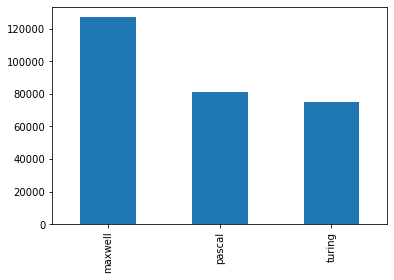

In [51]:
PAR = df4_SC['PARTITION'].value_counts()
PAR.plot(kind='bar')

In [55]:
df4_SC.head(50)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USED_SEC,REQ_SEC,time_day,time_delta,MEM,weighted_memorry
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,793,172800,00:13:13,0 days 00:13:13,18.66,14797.38
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,22,18000,00:00:22,0 days 00:00:22,0.00,0.00
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,537,18000,00:08:57,0 days 00:08:57,402.32,216045.84
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,18586,72000,05:09:46,0 days 05:09:46,417.62,7761885.32
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,15070,54000,04:11:10,0 days 04:11:10,450.09,6782856.30
5,32880721,glasshouse,brady,403.40M,3-12:00:00,18:49:36,1,1,1,pascal,0:0,COMPLETED,67776,302400,18:49:36,0 days 18:49:36,403.40,27340838.40
6,32880722,glasshouse,brady,0,3-12:00:00,3-12:00:07,1,1,1,pascal,0:0,COMPLETED,302407,302400,3days 12:00:07,3 days 12:00:07,0.00,0.00
7,32880741,malanga,arline,1119.66M,2-00:00:00,08:09:18,1,2,1,pascal,0:0,COMPLETED,29358,172800,08:09:18,0 days 08:09:18,1119.66,32870978.28
65,32880916,sunburst,demarcus,151.40M,4-00:00:00,00:05:33,1,1,1,pascal,0:0,COMPLETED,333,345600,00:05:33,0 days 00:05:33,151.40,50416.20
66,32880917,sunburst,demarcus,143.45M,4-00:00:00,00:05:28,1,1,1,pascal,0:0,COMPLETED,328,345600,00:05:28,0 days 00:05:28,143.45,47051.60


In [58]:
df4_SC['EXITCODE'].value_counts()

0:0    283333
Name: EXITCODE, dtype: int64